# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")

# Display the data table for preview
merge_df.head()                 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [32]:
# Checking the number of mice.

count = merge_df["Mouse ID"].value_counts()
print(len(count))


249


In [137]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

merge_df['Mouse ID'] = merge_df['Mouse ID'].astype('object')
grouped_mice = merge_df.groupby(['Mouse ID', 'Timepoint']).size().reset_index(name='count')
duplicate_groups = grouped_mice[grouped_mice['count'] > 1]
duplicate_mice = duplicate_groups['Mouse ID'].unique()

print(duplicate_mice)



['g989']


In [138]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_data = merge_df[merge_df['Mouse ID'] == 'g989']
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [65]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.copy()
for mouse_id in duplicate_mice:
    mouse_drop = clean_df[clean_df['Mouse ID'] == mouse_id].index
    clean_df = clean_df.drop(mouse_drop)
    
clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [66]:
# Checking the number of mice in the clean DataFrame.
unique_drop_mice = clean_df['Mouse ID'].unique()
print(len(unique_drop_mice))


248


## Summary Statistics

In [67]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped_regimen = clean_df.groupby('Drug Regimen')

mean_tumor_volume = grouped_regimen['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_regimen['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_regimen['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = grouped_regimen['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_regimen['Tumor Volume (mm3)'].sem()

summary_statistics = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_dev_tumor_volume,
    'Tumor Volume Std. Err.': sem_tumor_volume
})

summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [68]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics_advanced = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean', 
    median='median', 
    variance='var', 
    std_dev='std', 
    sem='sem'
)

summary_statistics_advanced

,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

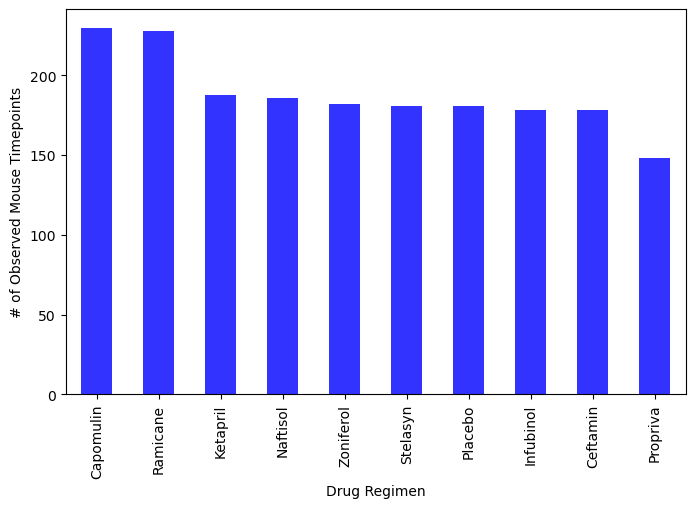

In [87]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

row_counts = clean_df['Drug Regimen'].value_counts()
row_counts.plot(kind='bar', color='blue', alpha=0.8, figsize=(8, 5))

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()


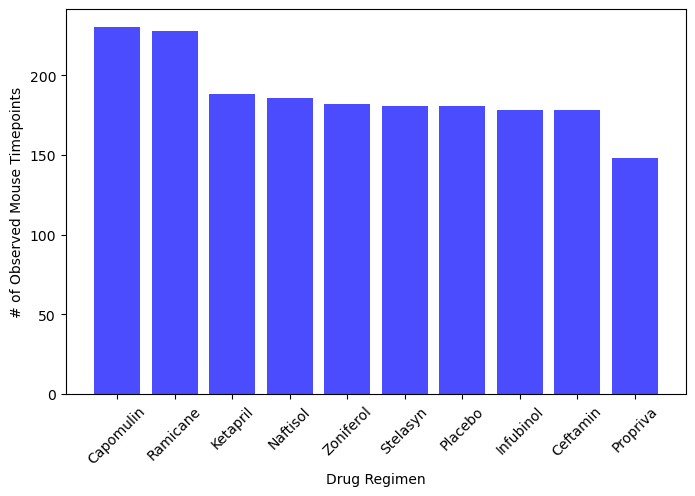

In [90]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_regimens = row_counts.index

plt.figure(figsize=(8, 5))
plt.bar(drug_regimens, row_counts, color='blue', alpha=0.7)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)

plt.show()

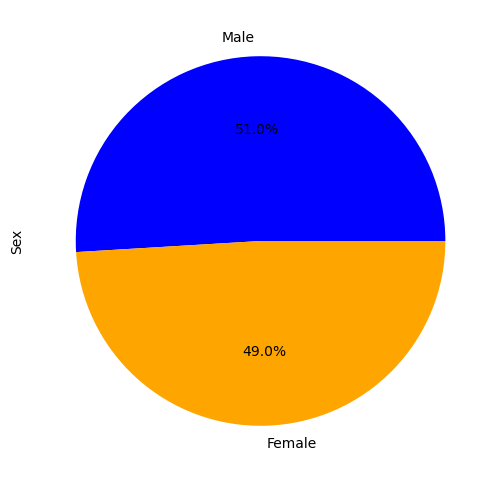

In [97]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_df['Sex'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=0, colors=['blue', 'orange'], figsize=(10, 6))
plt.show()


([<matplotlib.patches.Wedge at 0x128499900>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

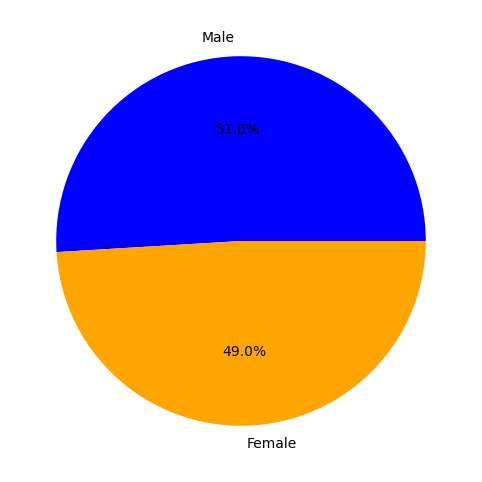

In [144]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_counts = clean_df['Sex'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=0, colors=['blue', 'orange'])


## Quartiles, Outliers and Boxplots

In [140]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
last_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()
last_timepoint = last_timepoint.reset_index()

merged_df = pd.merge(last_timepoint, clean_df, on=['Mouse ID', 'Timepoint'], how='left')

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint, clean_df, on=['Mouse ID', 'Timepoint'], how='right')
merged_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']].head()


,Mouse ID,Timepoint,Tumor Volume (mm3)
0,a203,45,67.973419
1,a251,45,65.525743
2,a262,45,70.717621
3,a275,45,62.999356
4,a366,30,63.440686


In [114]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = merged_df.loc[merged_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers}\n")
    
    


Capomulin's potential outliers: 174    23.343598
Name: Tumor Volume (mm3), dtype: float64

Ramicane's potential outliers: 96    22.050126
Name: Tumor Volume (mm3), dtype: float64

Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



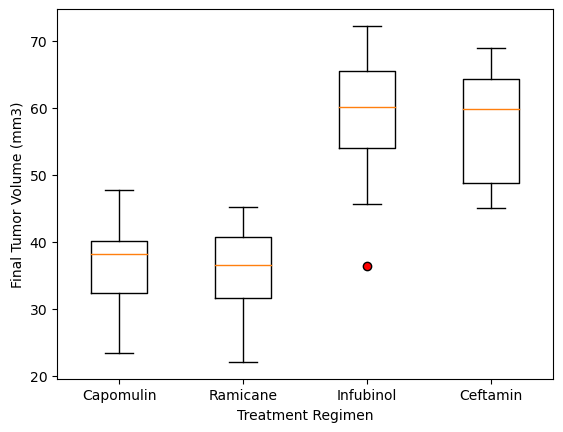

In [142]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, ax = plt.subplots()

red = dict(markerfacecolor='r', marker='o')
ax.boxplot(tumor_vol_data, labels=treatments, flierprops=red)
ax.set_xlabel('Treatment Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

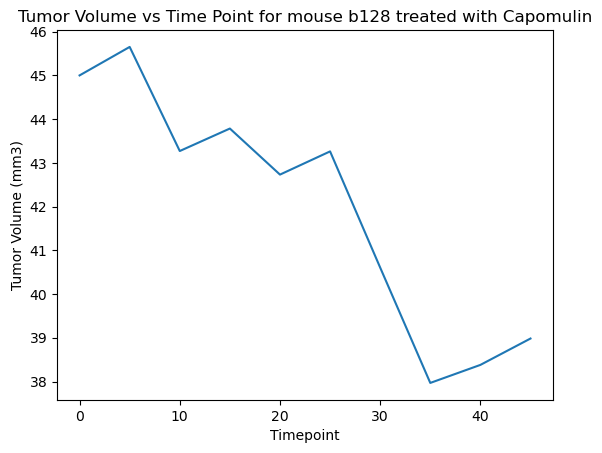

In [128]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_data = merge_df[merge_df['Drug Regimen'] == 'Capomulin']
mouse_id = capomulin_data['Mouse ID'].iloc[0]
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs Time Point for mouse {mouse_id} treated with Capomulin')
plt.show()

/var/folders/sr/dhgj0pd556lbz6w83rl0mc7c0000gn/T/ipykernel_19164/3956756140.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = capomulin_data.groupby('Mouse ID').mean()


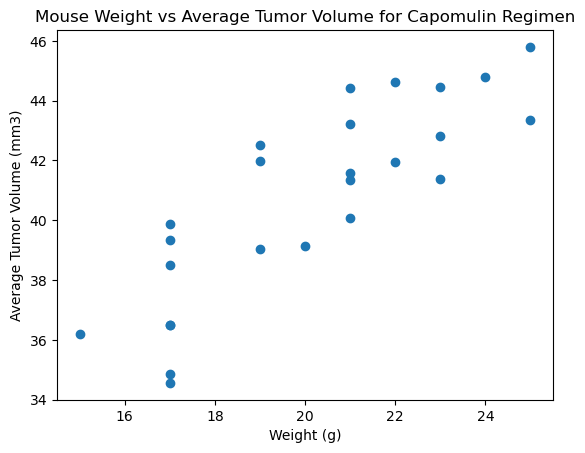

In [126]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = merge_df[merge_df['Drug Regimen'] == 'Capomulin']

grouped_data = capomulin_data.groupby('Mouse ID').mean()
plt.scatter(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


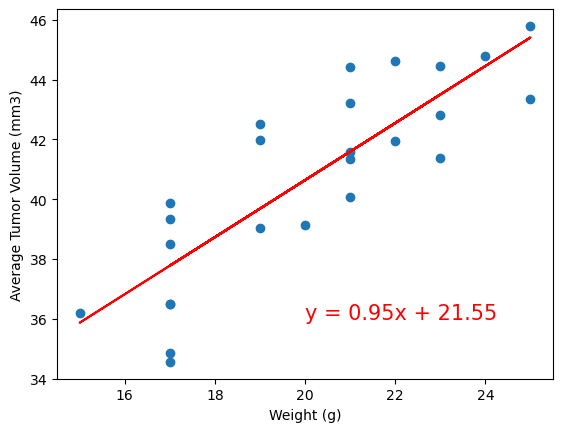

In [133]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

mouse_weights = grouped_data['Weight (g)']
average_tumor_volumes = grouped_data['Tumor Volume (mm3)']
correlation = st.pearsonr(mouse_weights, average_tumor_volumes)[0]
print(f'The correlation between mouse weight and average tumor volume is {correlation:.2f}')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weights, average_tumor_volumes)
regress_values = mouse_weights * slope + intercept
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.scatter(mouse_weights, average_tumor_volumes)
plt.plot(mouse_weights, regress_values, 'r')
plt.annotate(line_eq, (20, 36), fontsize=15, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
